# Linear Similarity 

This notebooks explores the linear similarity (dot product) across different timestamps from the same variable with a configuration of the variable that relates highly to heatwaves (in the same timestamp).

In [1]:
import pandas as pd

import os
import numpy as np
import sys
import xarray as xr
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from IndexDrivers import calculate_anomalies, Index

c:\Users\marti\Desktop\data\hw_extra


In [3]:
data_850 = xr.load_dataset("data/local_data/3means_850hpa_east_pacific.nc")
data_msl = xr.load_dataset("data/local_data/MSLP_east_pacific.nc").sel(time=slice("1971-01", "2023-12"))
data_single = xr.load_dataset("data/local_data/7means_east_pacific.nc")

In [4]:
hws_dates = {1: ['2016-01-01', '2017-01-01', '2013-01-01'],
             2: ['2020-02-01', '2005-02-01', '2008-02-01'],
             3: ['2015-03-01', '2009-03-01', '2012-03-01'],
             4: ['2009-04-01', '2017-04-01', '2015-04-01'],
             5: ['2020-05-01', '1998-05-01', '2023-05-01'],
             6: ['1987-06-01', '2015-06-01', '1991-06-01'],
             7: ['2023-07-01', '2006-07-01', '1996-07-01'],
             8: ['1997-08-01', '2001-08-01', '2003-08-01'],
             9: ['2016-09-01', '2008-09-01', '1996-09-01'],
             10: ['1983-10-01', '1989-10-01', '2014-10-01'],
             11: ['2019-11-01', '2008-11-01', '2022-11-01'],
             12: ['2021-12-01', '2001-12-01', '2013-12-01']}

non_hws_dates = {1: ['1975-01-01', '1974-01-01', '1981-01-01'],
             2: ['1975-02-01', '1972-02-01', '1986-02-01'],
             3: ['1975-03-01', '1972-03-01', '1985-03-01'],
             4: ['1975-04-01', '1973-04-01', '2000-04-01'],
             5: ['2000-05-01', '2001-05-01', '1975-05-01'],
             6: ['2007-06-01', '1975-06-01', '2011-06-01'],
             7: ['1971-07-01', '2017-07-01', '2007-07-01'],
             8: ['2017-08-01', '2007-08-01', '1971-08-01'],
             9: ['2007-09-01', '1987-09-01', '2017-09-01'],
             10: ['2023-10-01', '2017-10-01', '1987-10-01'],
             11: ['1990-11-01', '2017-11-01', '1973-11-01'],
             12: ['1975-12-01', '1973-12-01', '1974-12-01']}

high_hws_dates = ["2015-03-01", "2016-09-01", "1997-08-01", "2017-02-01", "2019-02-01", "2014-08-01"]
low_hws_date = ["2000-05-01", "1990-11-01", "2001-05-01", "1975-05-01"]

def is_month(month, n):
    return month == n

## Wind Index Attempt

In [5]:
normalized_850 = calculate_anomalies(data_850, [1980,2010], std=False)
msl_anoms = calculate_anomalies(data_msl, [1980,2010], std=False)

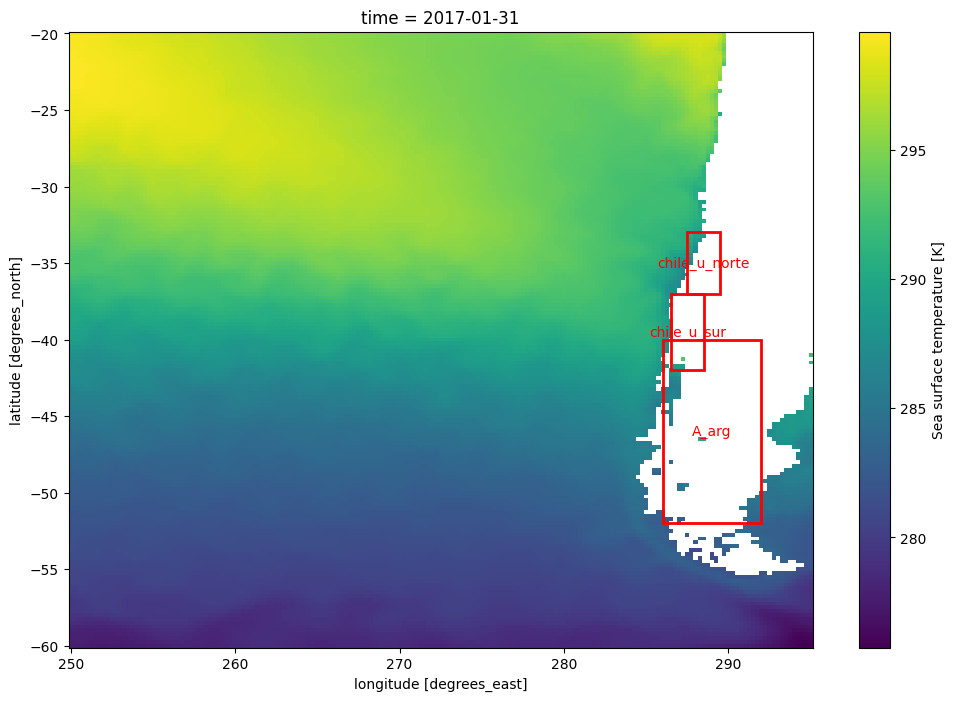

In [6]:
boxes_chile_winds = {
    "chile_u_norte": [287.5, 289.5, -37, -33],
    "chile_u_sur": [286.5, 288.5, -42, -37],
    "A_arg": [286, 292, -52, -40]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sel(longitude=slice(250,295), latitude=slice(-60,-20), time="2017-01").sst.plot(ax=ax)

for box_id, coords in boxes_chile_winds.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()

In [7]:
def wind_index(data, box, normalize=False):
    wind = data.sel(longitude=slice(box[0], box[1]), latitude=slice(box[2], box[3])).mean(dim=["longitude", "latitude"]).to_numpy()
    if normalize:
        return (wind-np.mean(wind))/np.std(wind)
    return wind

raco_index = wind_index(normalized_850.u, boxes_chile_winds["chile_u_norte"])
puelche_index = wind_index(normalized_850.u, boxes_chile_winds["chile_u_sur"])
alta_index = wind_index(calculate_anomalies(data_msl, [1980,2010], std=False).msl, boxes_chile_winds["A_arg"])

Text(0.5, 1.0, 'Alta Index and HW dates')

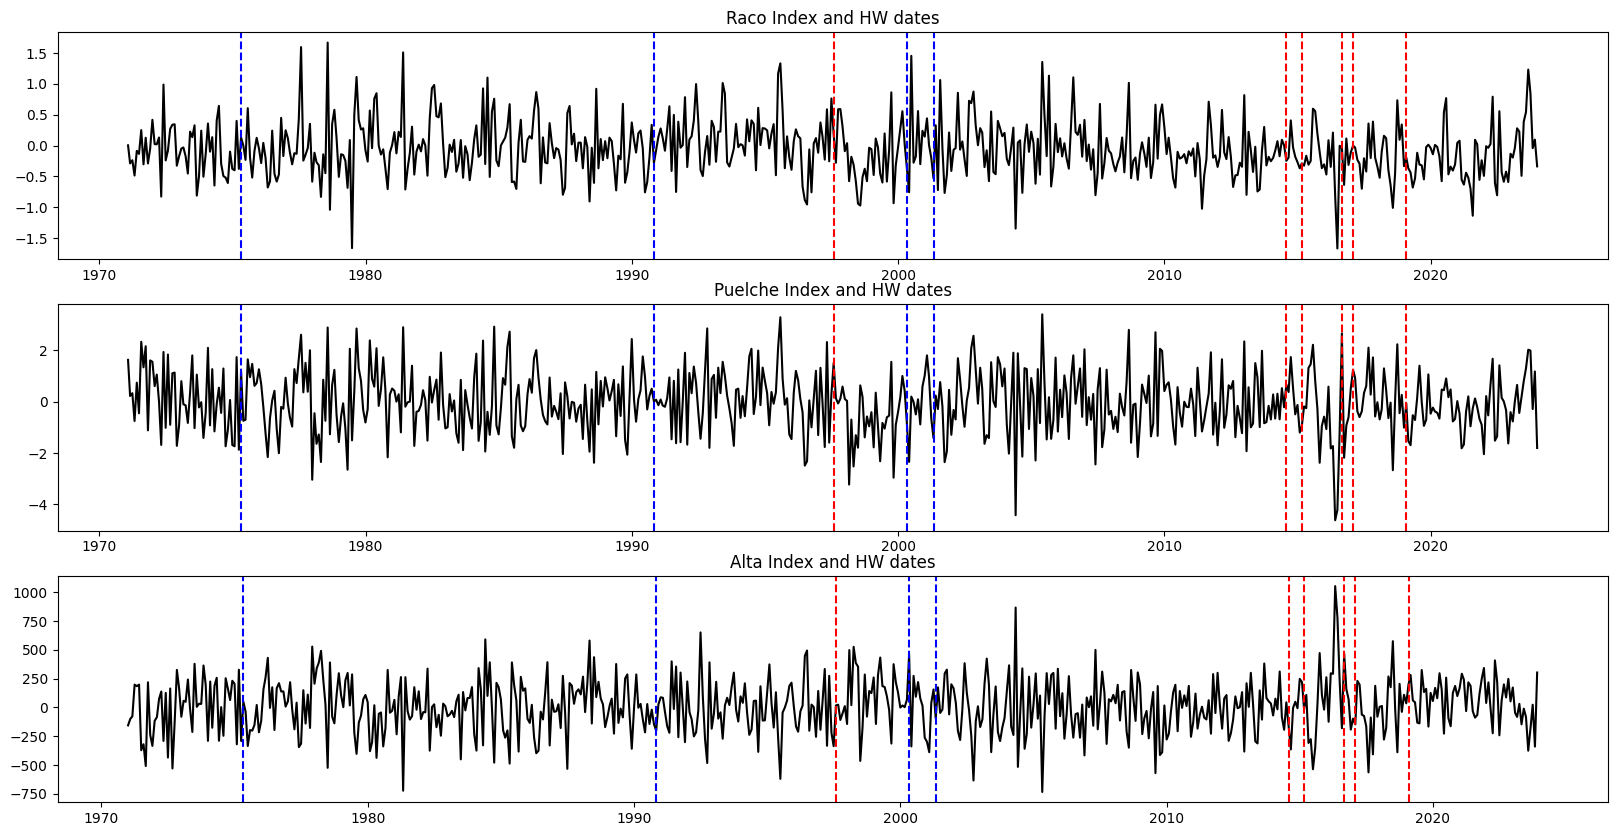

In [8]:
fig, axs = plt.subplots(3, figsize=(20,10))
axs[0].plot(normalized_850.time, raco_index, c="black")
for date in high_hws_dates:
    axs[0].axvline(pd.to_datetime(date), color="red", ls='--')
for date in low_hws_date:
    axs[0].axvline(pd.to_datetime(date), color="blue", ls='--')
axs[0].set_title("Raco Index and HW dates")
axs[1].plot(normalized_850.time, puelche_index, c="black")
for date in high_hws_dates:
    axs[1].axvline(pd.to_datetime(date), color="red", ls='--')
for date in low_hws_date:
    axs[1].axvline(pd.to_datetime(date), color="blue", ls='--')
axs[1].set_title("Puelche Index and HW dates")
axs[2].plot(data_msl.time, alta_index, c="black")
for date in high_hws_dates:
    axs[2].axvline(pd.to_datetime(date), color="red", ls='--')
for date in low_hws_date:
    axs[2].axvline(pd.to_datetime(date), color="blue", ls='--')
axs[2].set_title("Alta Index and HW dates")


In [9]:
raco_seasons = {}
puelche_seasons = {}
alta_seasons = {}
seasons = {i: normalized_850.sel(time=is_month(normalized_850['time.month'], i)).u for i in range(1,13)}
msl_seasons = {i: msl_anoms.sel(time=is_month(msl_anoms['time.month'], i)).msl for i in range(1,13)}
for season, datas in seasons.items():
    raco_seasons[season] = wind_index(datas, boxes_chile_winds["chile_u_norte"])
    puelche_seasons[season] = wind_index(datas, boxes_chile_winds["chile_u_sur"])
for season, datas in msl_seasons.items():
    alta_seasons[season] = wind_index(datas, boxes_chile_winds["chile_u_sur"])

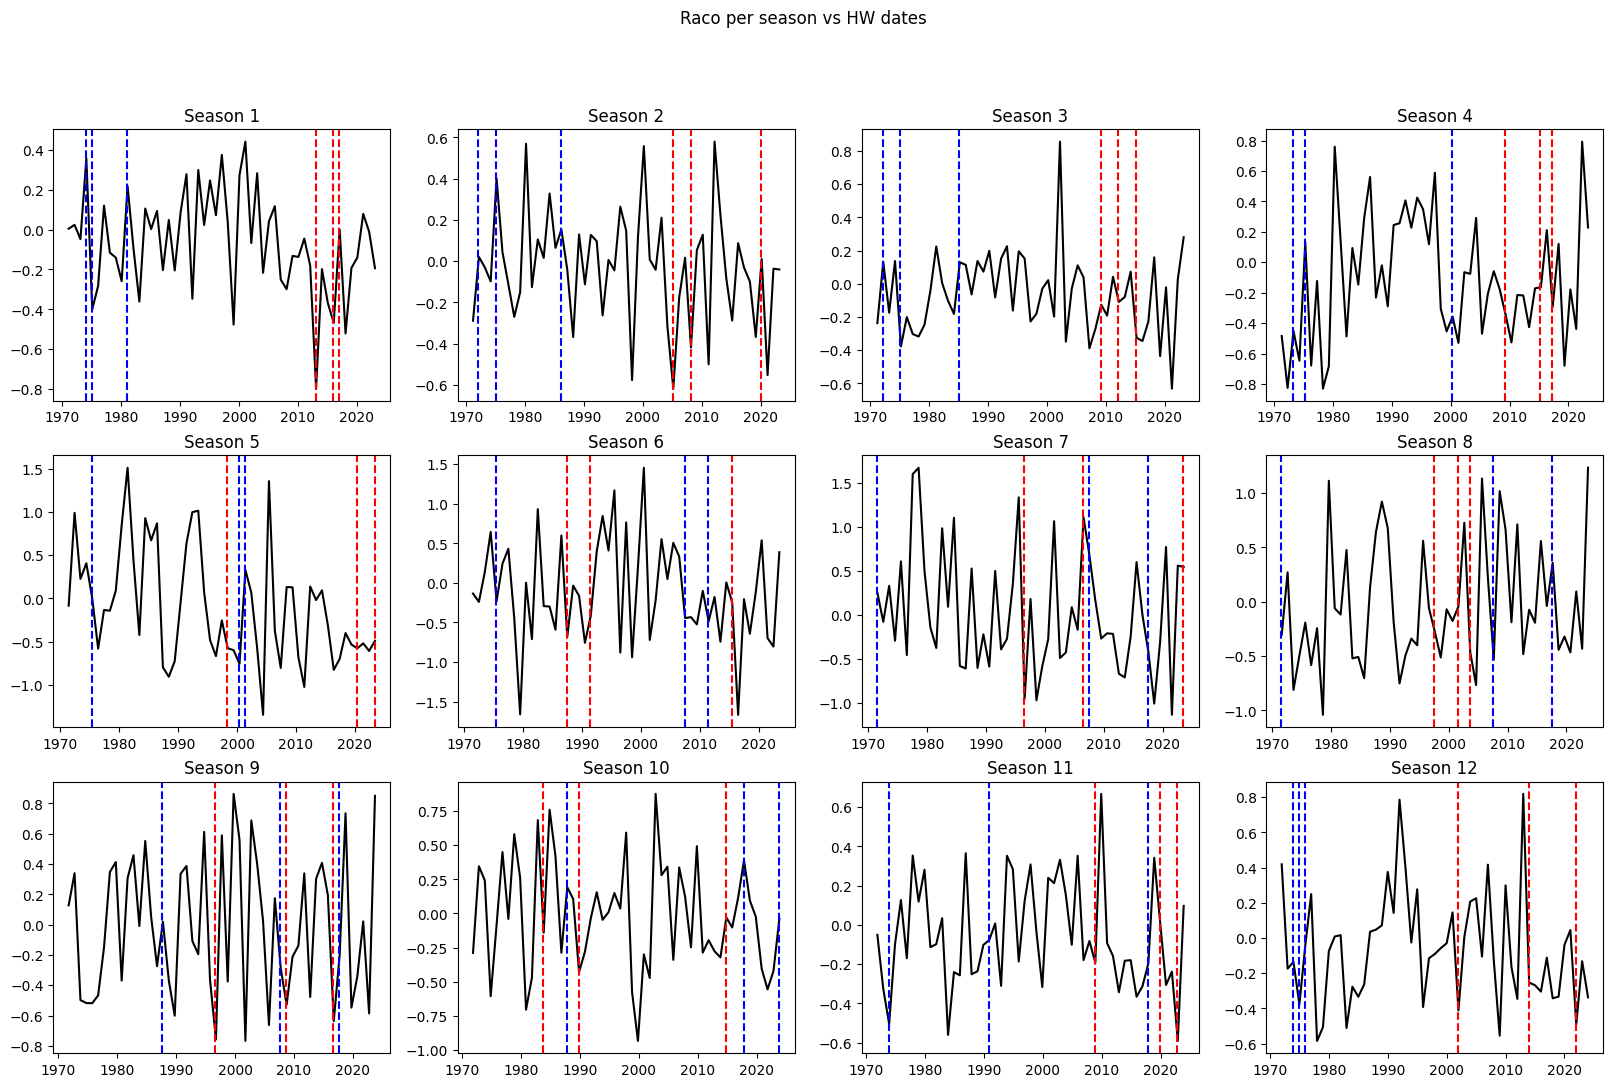

In [10]:
fig, axs = plt.subplots(3,4, figsize=(20,12))
for season, ts in raco_seasons.items():
    axs.flatten()[season-1].plot(seasons[season].time, ts, c="black")
    axs.flatten()[season-1].set_title(f"Season {season}")
for season, dates in hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="red", ls='--')
for season, dates in non_hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="blue", ls='--')
fig.suptitle("Raco per season vs HW dates")
plt.show()

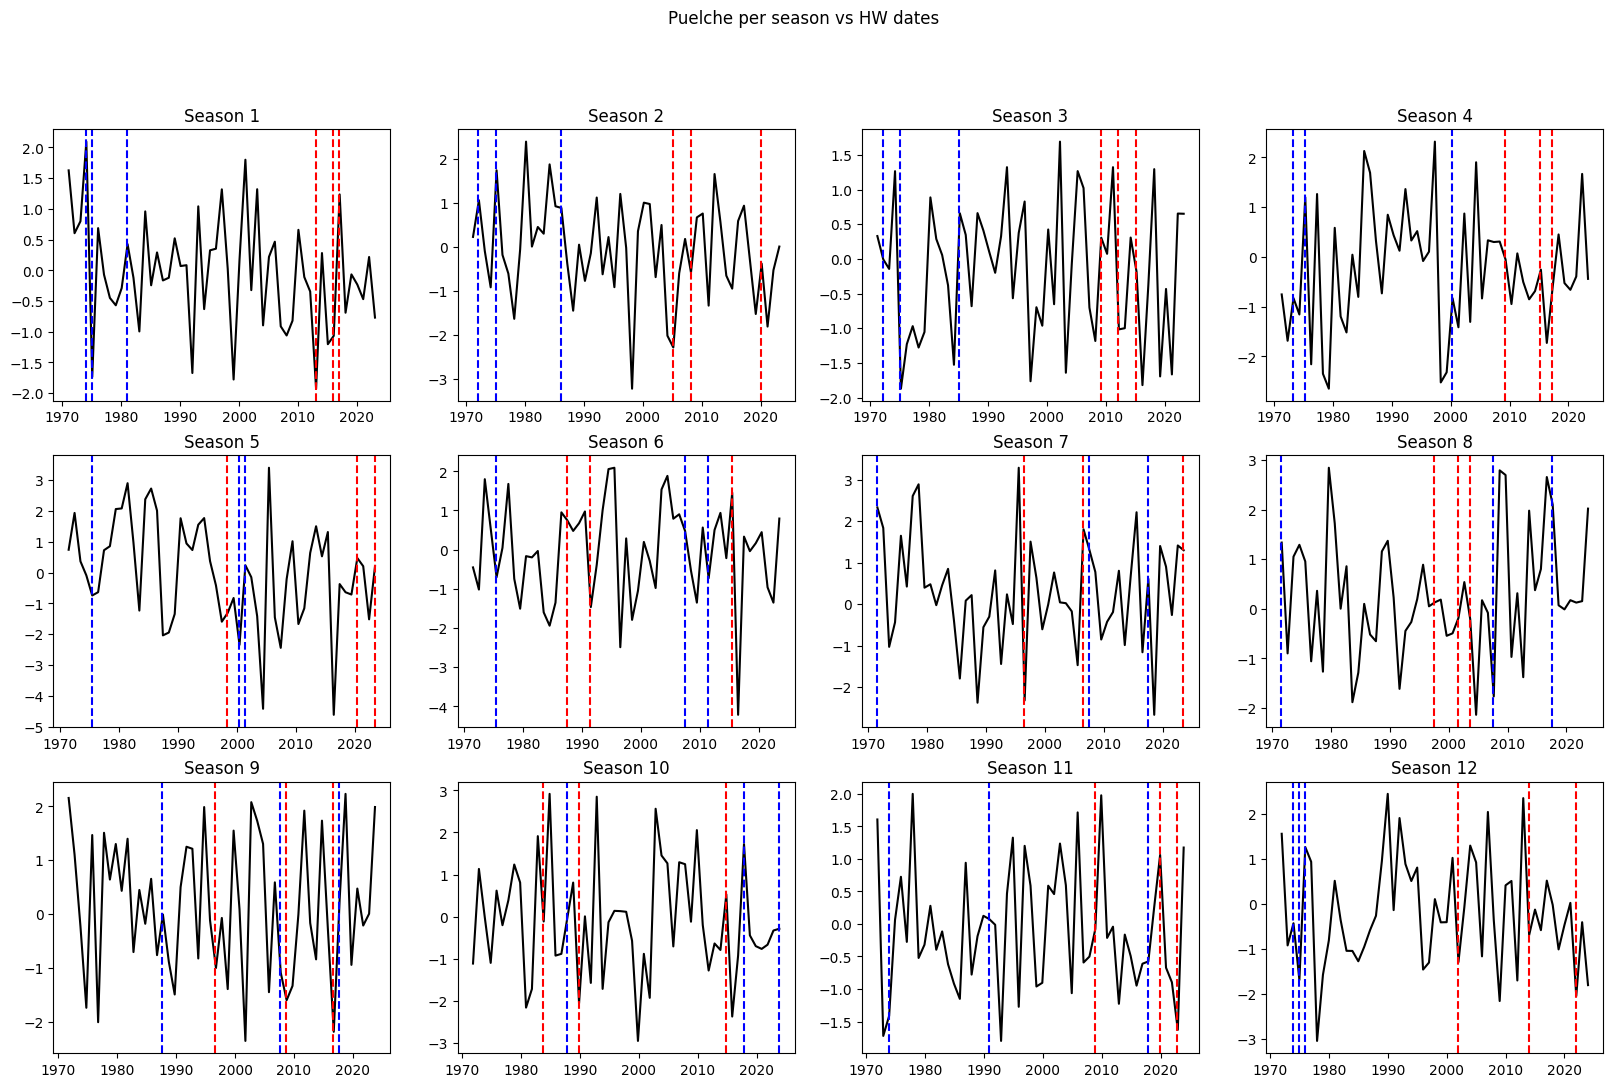

In [11]:
fig, axs = plt.subplots(3,4, figsize=(20,12))
for season, ts in puelche_seasons.items():
    axs.flatten()[season-1].plot(seasons[season].time, ts, c="black")
    axs.flatten()[season-1].set_title(f"Season {season}")
for season, dates in hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="red", ls='--')
for season, dates in non_hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="blue", ls='--')
fig.suptitle("Puelche per season vs HW dates")
plt.show()

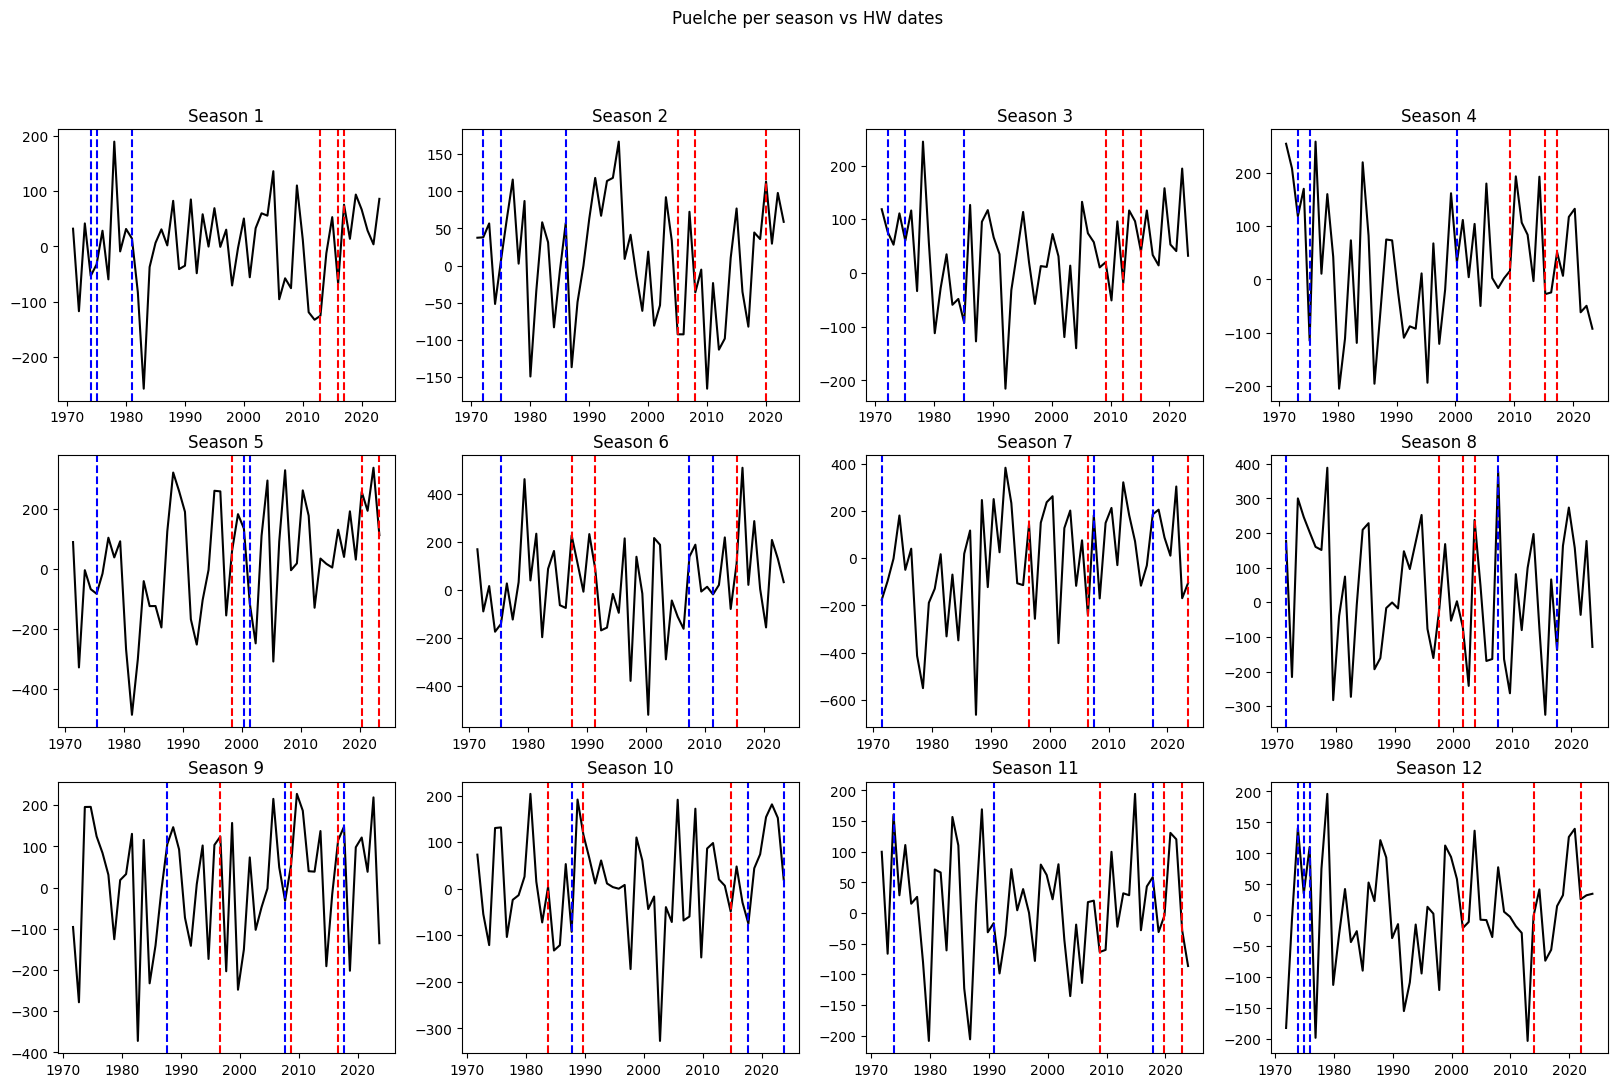

In [12]:
fig, axs = plt.subplots(3,4, figsize=(20,12))
for season, ts in alta_seasons.items():
    axs.flatten()[season-1].plot(msl_seasons[season].time, ts, c="black")
    axs.flatten()[season-1].set_title(f"Season {season}")
for season, dates in hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="red", ls='--')
for season, dates in non_hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="blue", ls='--')
fig.suptitle("Puelche per season vs HW dates")
plt.show()

In [13]:
raco_max = np.argpartition(raco_index, -4)[:4]
puelche_max = np.argpartition(puelche_index, -4)[:4]
alta_max = np.argpartition(alta_index, -4)[-4:]

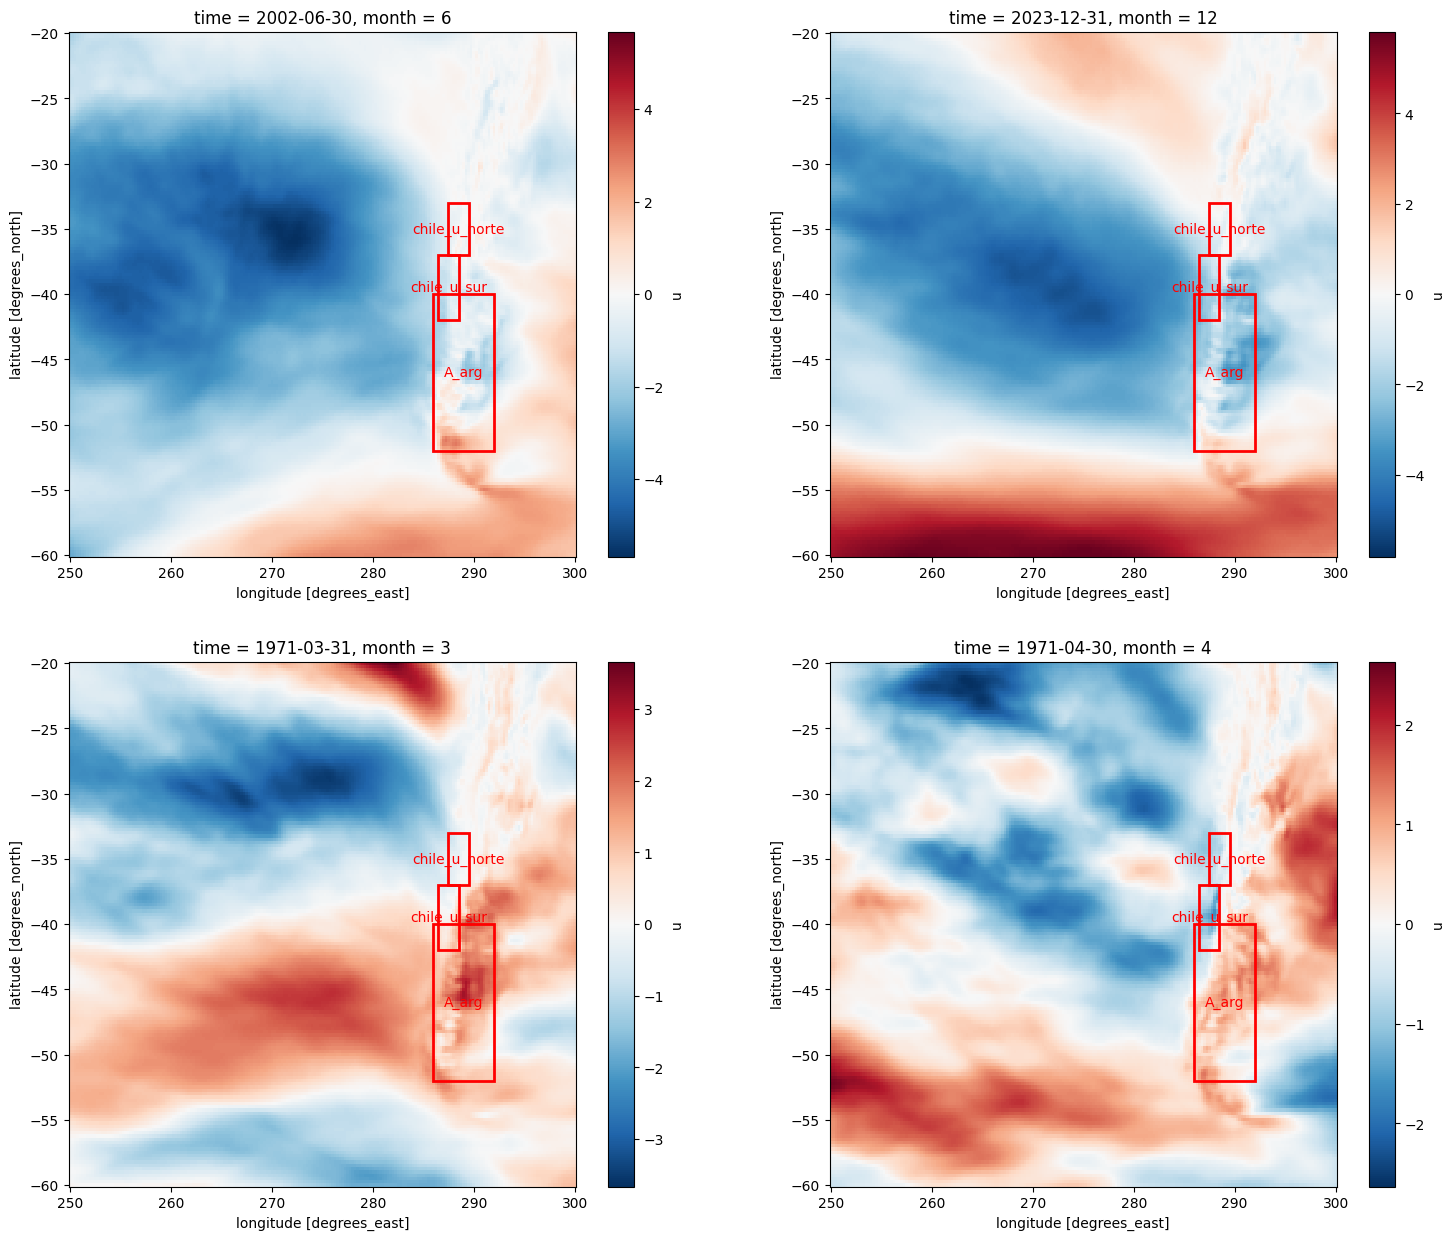

In [14]:
fig, ax = plt.subplots(2,2 , figsize=(18, 15))

for i, timestamp in enumerate(raco_max):
    normalized_850.sel(longitude=slice(250,310), latitude=slice(-60,-20)).isel(time=timestamp).u.plot(ax=ax.flatten()[i])

    for box_id, coords in boxes_chile_winds.items():
        lon_min, lon_max, lat_min, lat_max = coords
        width = lon_max - lon_min
        height = lat_max - lat_min
        
        # Create rectangle patch
        rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                                fill=False, edgecolor='red', linewidth=2)
        ax.flatten()[i].add_patch(rect)
        
        # Optionally add a label
        ax.flatten()[i].text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
                ha='center', va='center', color='red')

plt.show()

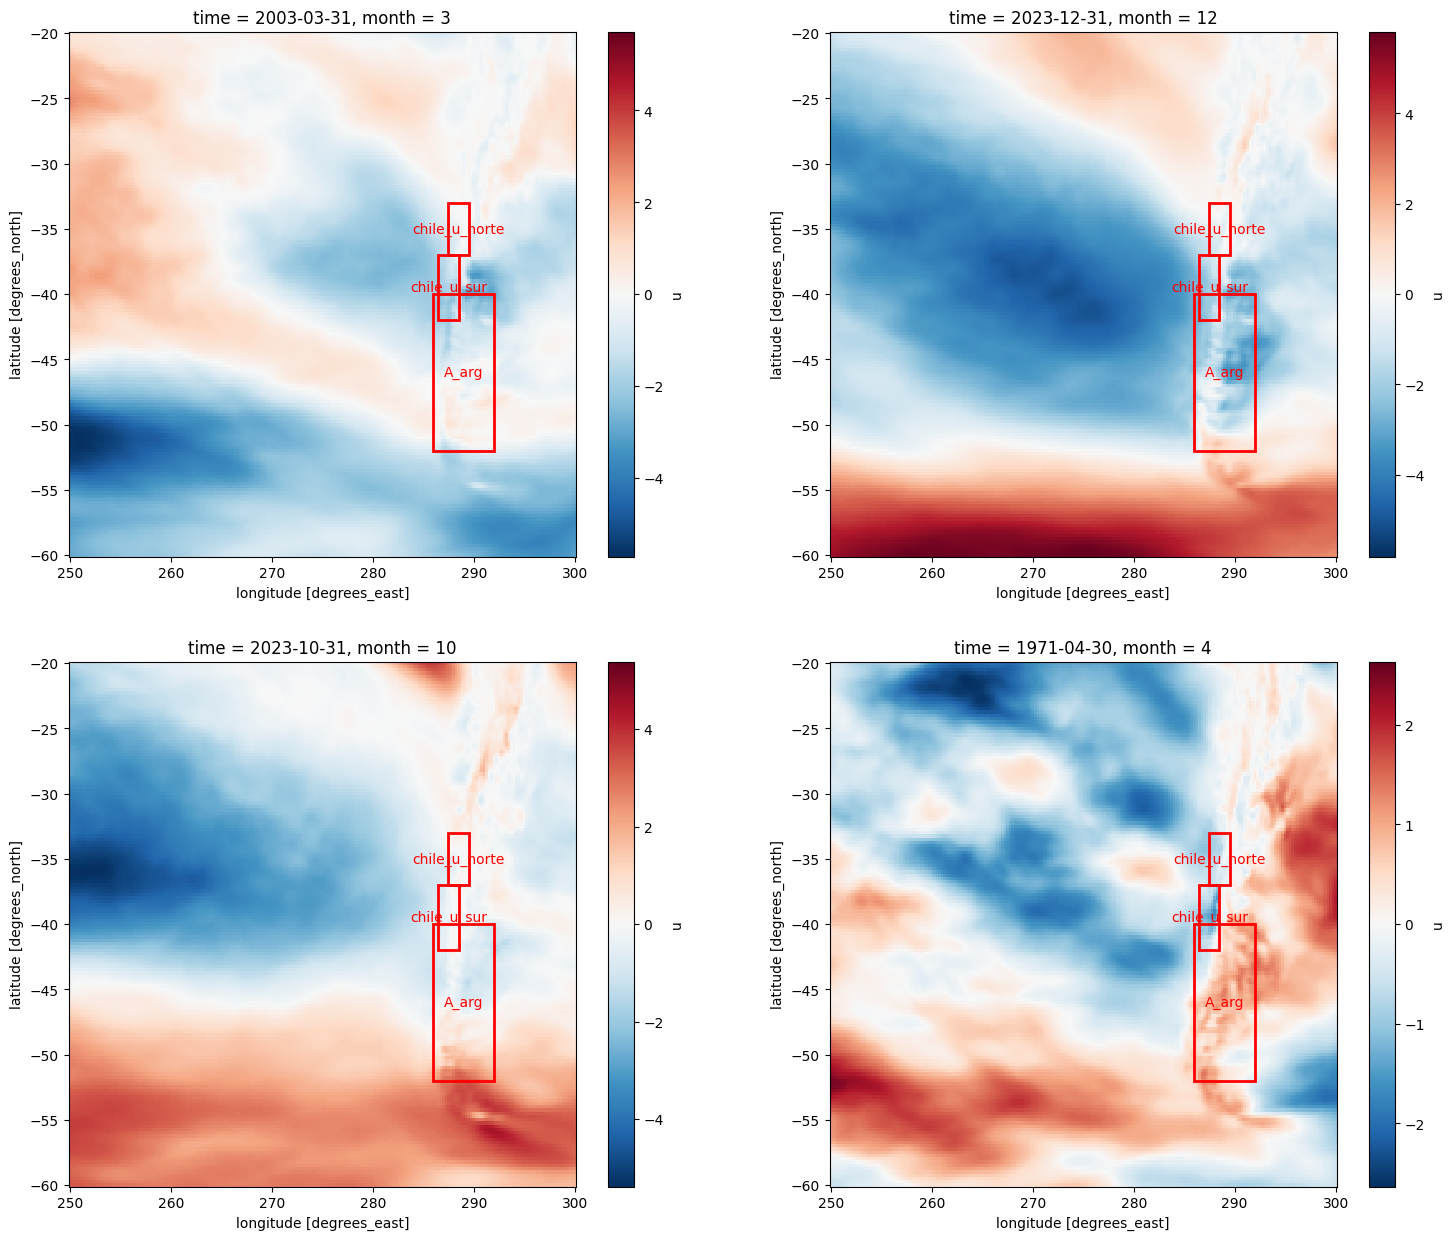

In [15]:
fig, ax = plt.subplots(2,2 , figsize=(18, 15))

for i, timestamp in enumerate(puelche_max):
    normalized_850.sel(longitude=slice(250,310), latitude=slice(-60,-20)).isel(time=timestamp).u.plot(ax=ax.flatten()[i])

    for box_id, coords in boxes_chile_winds.items():
        lon_min, lon_max, lat_min, lat_max = coords
        width = lon_max - lon_min
        height = lat_max - lat_min
        
        # Create rectangle patch
        rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                                fill=False, edgecolor='red', linewidth=2)
        ax.flatten()[i].add_patch(rect)
        
        # Optionally add a label
        ax.flatten()[i].text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
                ha='center', va='center', color='red')

plt.show()

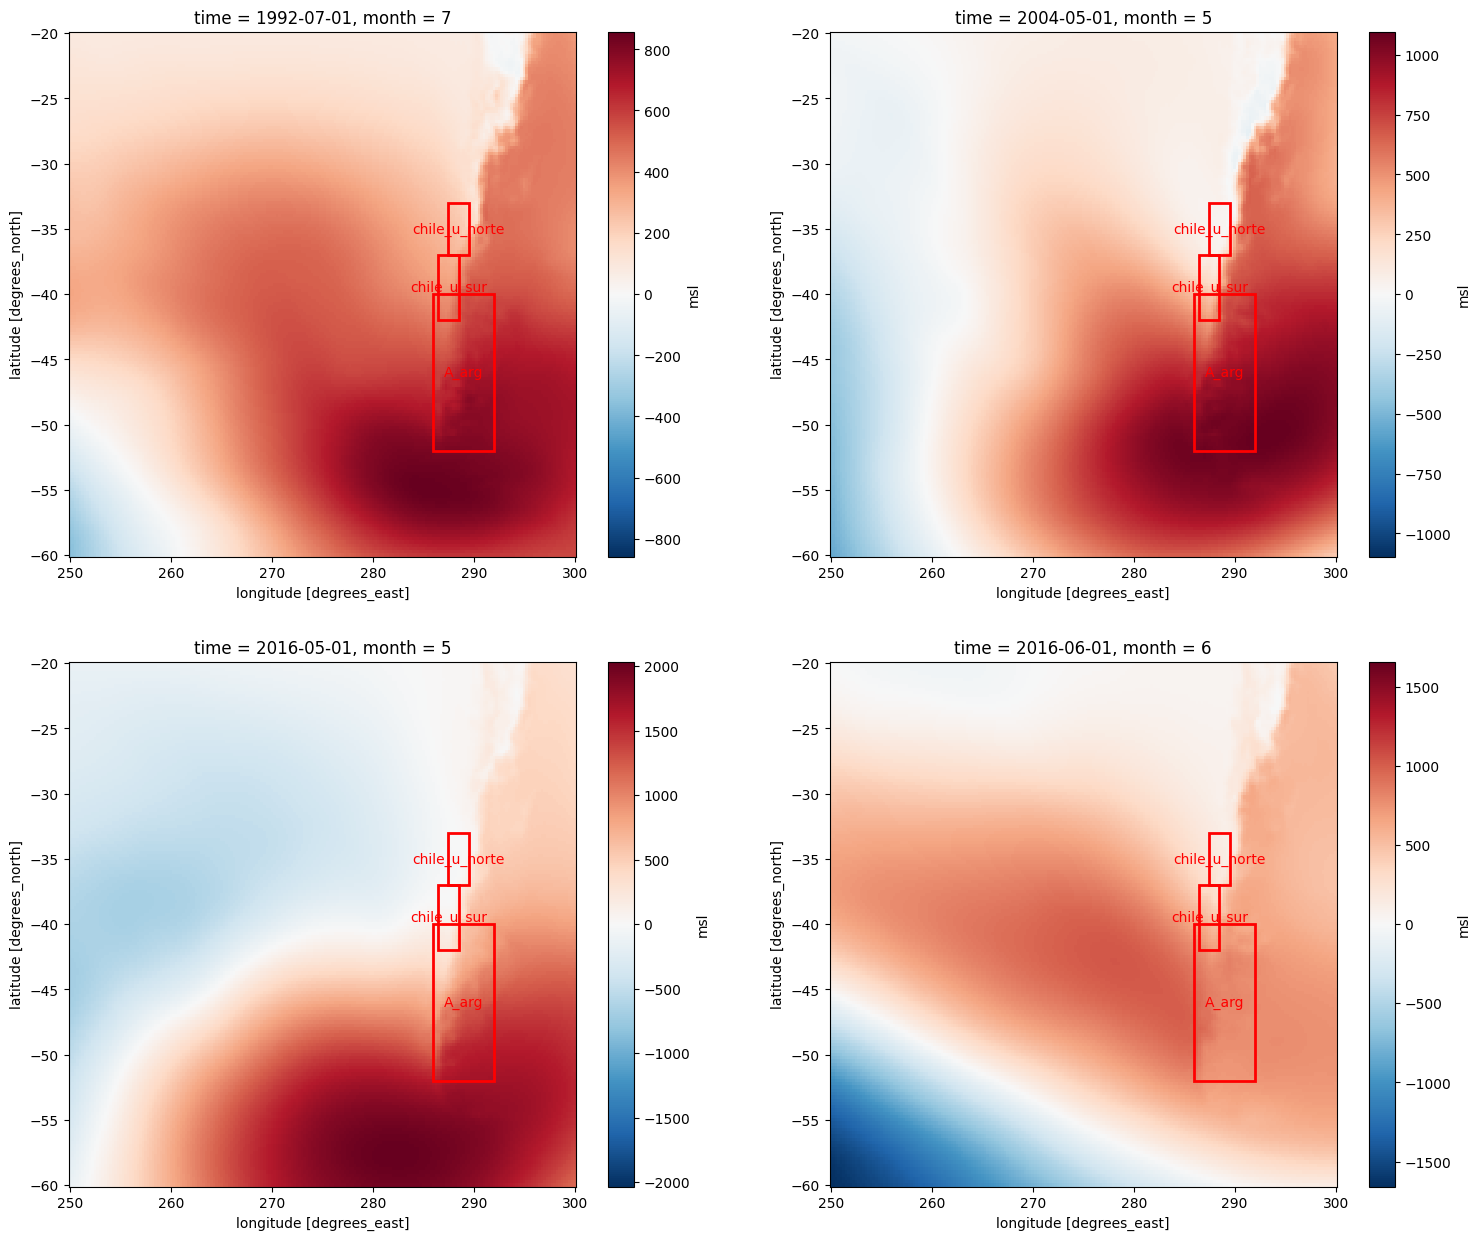

In [16]:
fig, ax = plt.subplots(2,2 , figsize=(18, 15))

for i, timestamp in enumerate(alta_max):
    msl_anoms.sel(longitude=slice(250,310), latitude=slice(-60,-20)).isel(time=timestamp).msl.plot(ax=ax.flatten()[i])

    for box_id, coords in boxes_chile_winds.items():
        lon_min, lon_max, lat_min, lat_max = coords
        width = lon_max - lon_min
        height = lat_max - lat_min
        
        # Create rectangle patch
        rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                                fill=False, edgecolor='red', linewidth=2)
        ax.flatten()[i].add_patch(rect)
        
        # Optionally add a label
        ax.flatten()[i].text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
                ha='center', va='center', color='red')

plt.show()

Now lets try build the index as the difference between the high pressure anomaly average (normalized) and each wind anomaly average (normalized)

In [17]:
def bloqueo_index(wind, pressure):
    wind = (wind-np.mean(wind))/np.std(wind)
    pressure = (pressure-np.mean(pressure))/np.std(pressure)
    return pressure - wind

In [18]:
norte_bloqueo_index = bloqueo_index(raco_index, alta_index)
sur_bloqueo_index = bloqueo_index(puelche_index, alta_index)


Text(0.5, 1.0, 'Sur Bloqueo Index and HW dates')

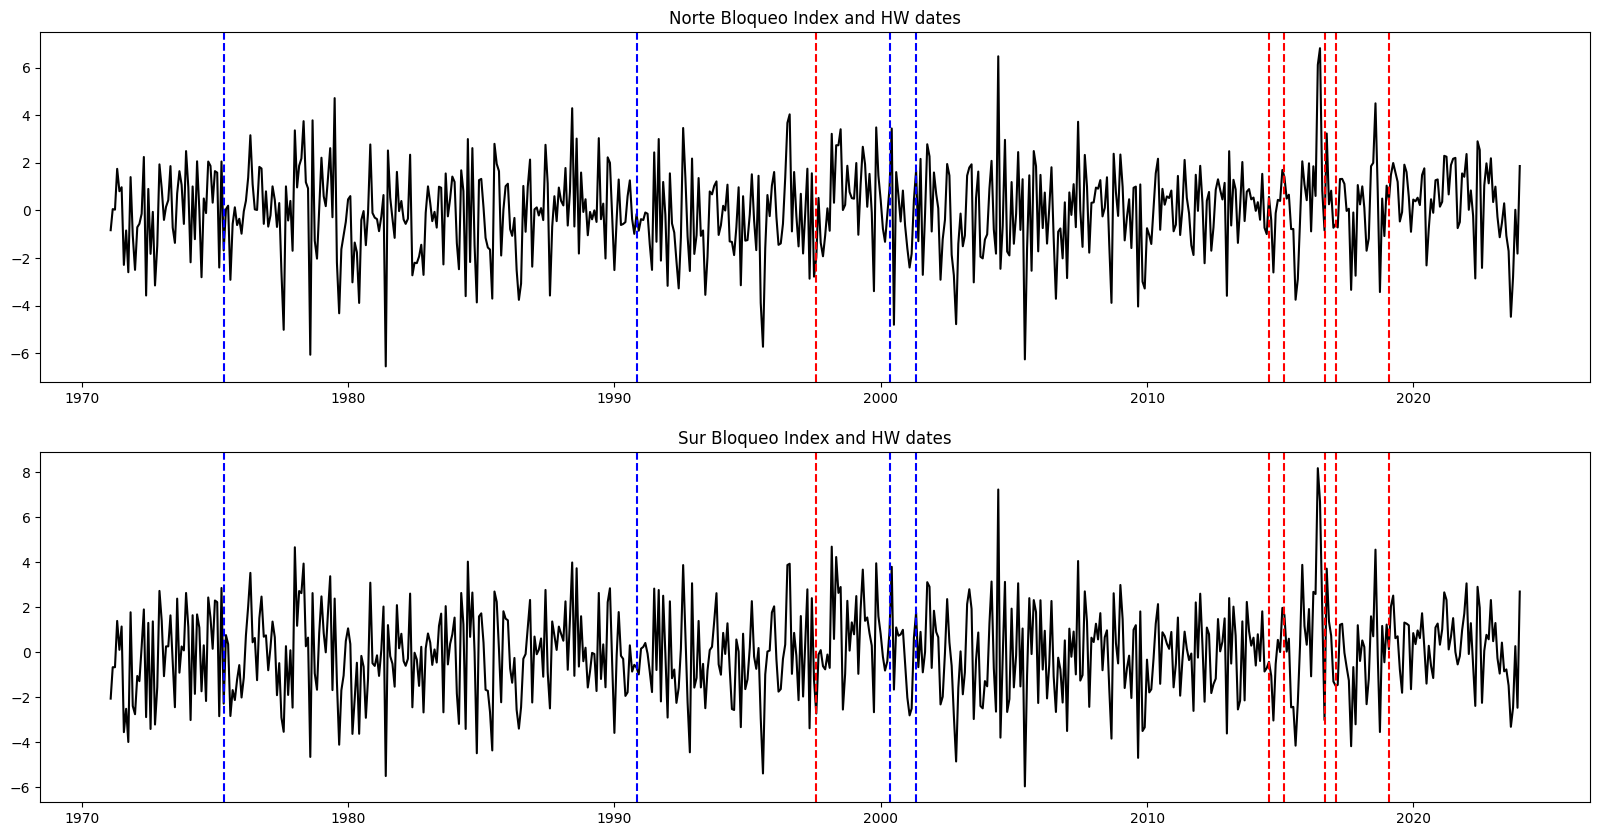

In [19]:
fig, axs = plt.subplots(2, figsize=(20,10))
axs[0].plot(normalized_850.time, norte_bloqueo_index, c="black")
for date in high_hws_dates:
    axs[0].axvline(pd.to_datetime(date), color="red", ls='--')
for date in low_hws_date:
    axs[0].axvline(pd.to_datetime(date), color="blue", ls='--')
axs[0].set_title("Norte Bloqueo Index and HW dates")
axs[1].plot(normalized_850.time, sur_bloqueo_index, c="black")
for date in high_hws_dates:
    axs[1].axvline(pd.to_datetime(date), color="red", ls='--')
for date in low_hws_date:
    axs[1].axvline(pd.to_datetime(date), color="blue", ls='--')
axs[1].set_title("Sur Bloqueo Index and HW dates")


In [20]:
norte_seasons = {}
sur_seasons = {}
for season, datas in seasons.items():
    norte_seasons[season] = bloqueo_index(raco_seasons[season], alta_seasons[season])
    sur_seasons[season] = bloqueo_index(puelche_seasons[season], alta_seasons[season])

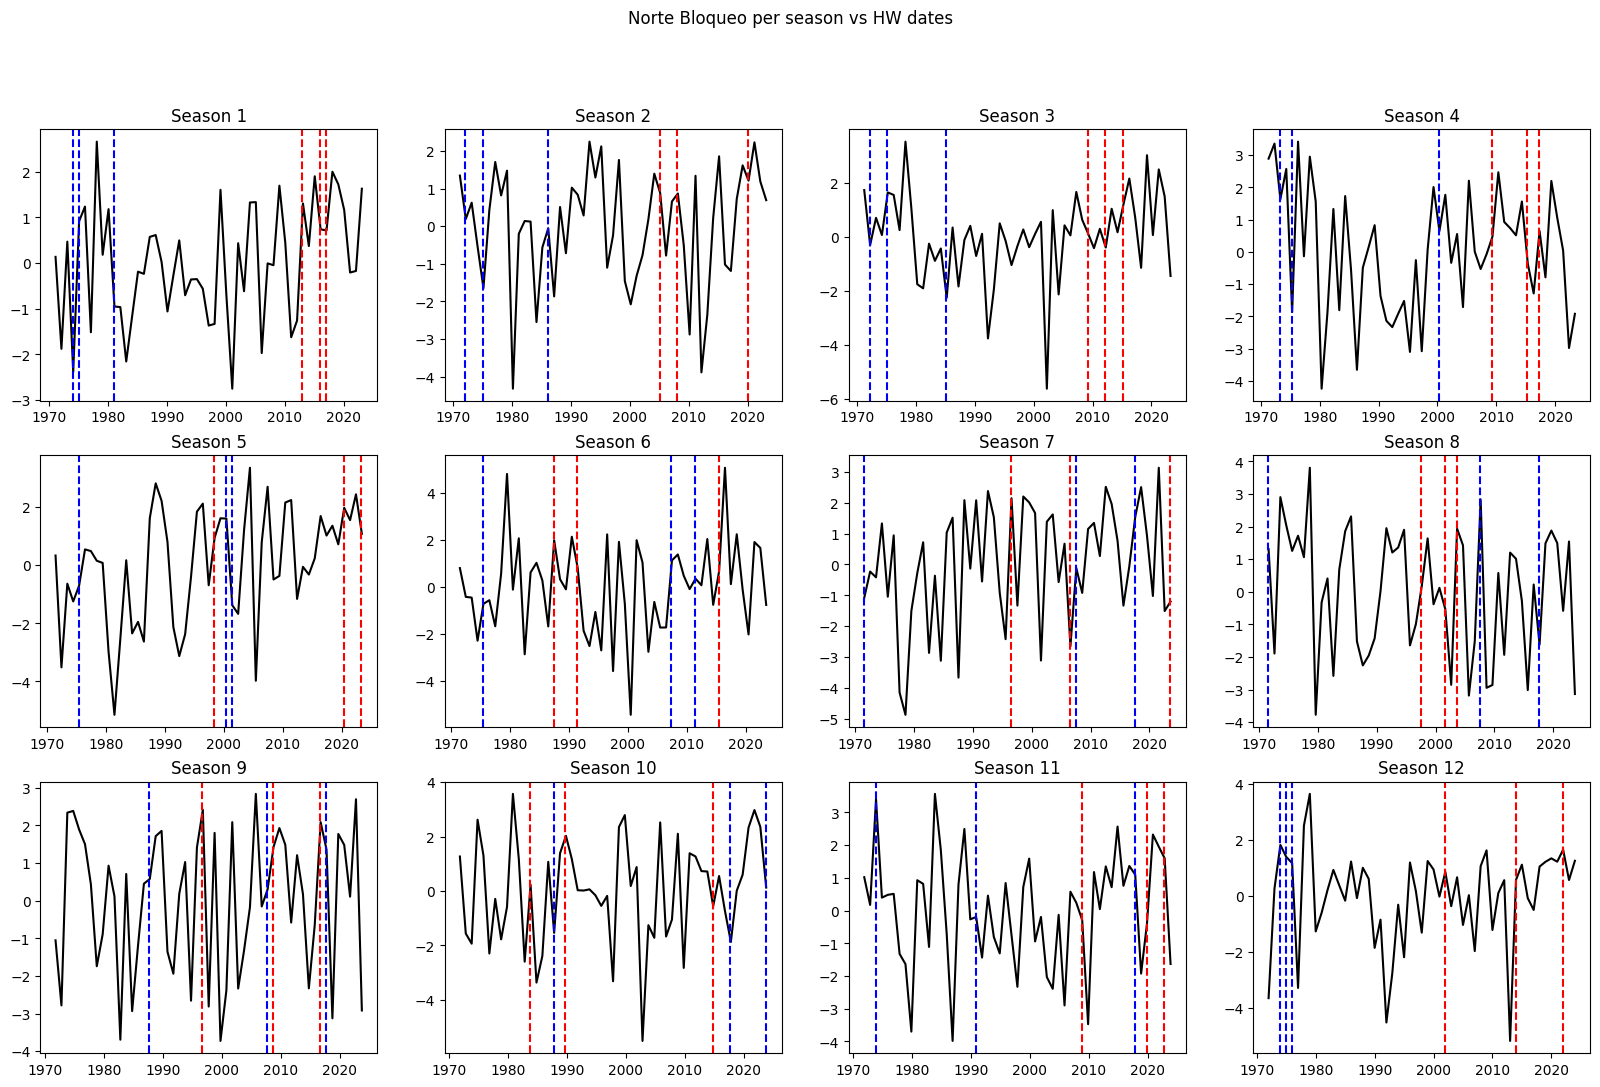

In [21]:
fig, axs = plt.subplots(3,4, figsize=(20,12))
for season, ts in norte_seasons.items():
    axs.flatten()[season-1].plot(seasons[season].time, ts, c="black")
    axs.flatten()[season-1].set_title(f"Season {season}")
for season, dates in hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="red", ls='--')
for season, dates in non_hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="blue", ls='--')
fig.suptitle("Norte Bloqueo per season vs HW dates")
plt.show()

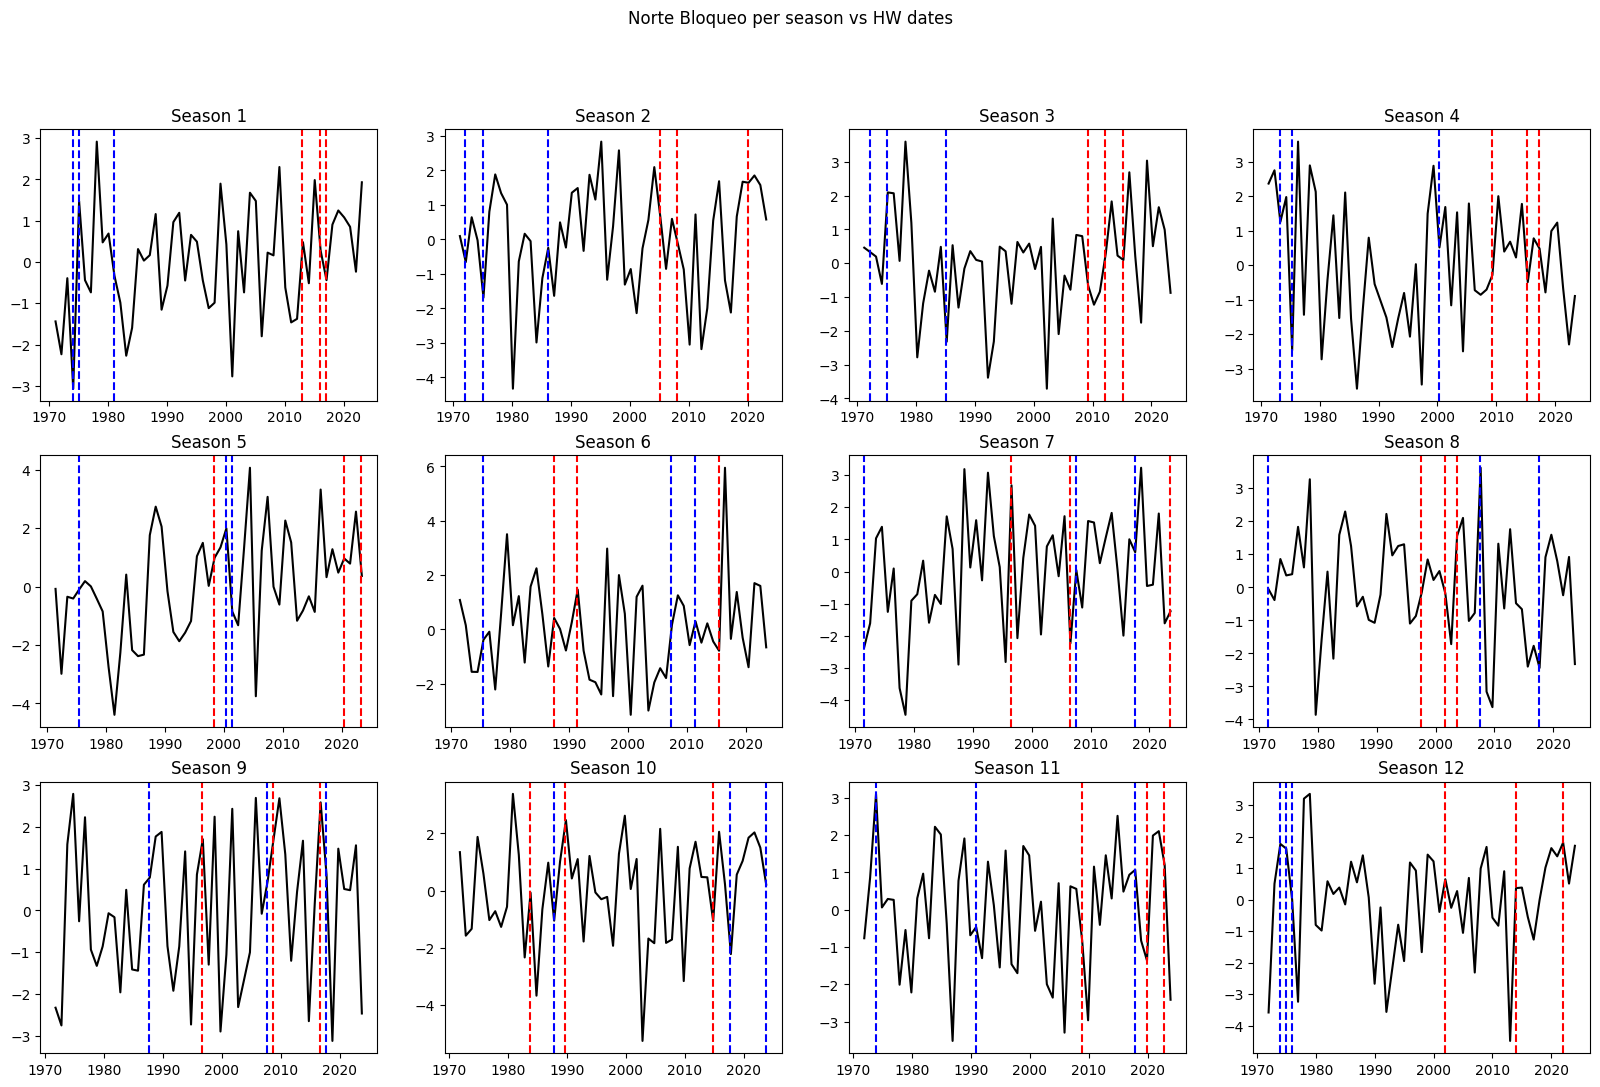

In [22]:
fig, axs = plt.subplots(3,4, figsize=(20,12))
for season, ts in sur_seasons.items():
    axs.flatten()[season-1].plot(seasons[season].time, ts, c="black")
    axs.flatten()[season-1].set_title(f"Season {season}")
for season, dates in hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="red", ls='--')
for season, dates in non_hws_dates.items():
    for d in dates:
        axs.flatten()[season-1].axvline(pd.to_datetime(d), color="blue", ls='--')
fig.suptitle("Norte Bloqueo per season vs HW dates")
plt.show()

In [47]:
norte_df = data_850.time.to_dataframe()

In [48]:
norte_df["bloqueo_index"] = norte_bloqueo_index
norte_df = norte_df.drop(columns="time")
norte_df = norte_df[(norte_df.index.year >= 1972) & (norte_df.index.year <=2022)]
norte_df.index = norte_df.index.to_numpy().astype('datetime64[M]')  # Set the index as first day of the month
norte_df.index.name = "Date"
norte_df

,bloqueo_index
Date,
1972-01-01,-0.705157
1972-02-01,-0.560854
1972-03-01,-0.138042
1972-04-01,2.244536
1972-05-01,-3.570526
...,...
2022-08-01,1.046944
2022-09-01,1.977614
2022-10-01,1.138838


In [49]:
n_index = Index(data_850, ["U"], boxes_chile_winds["A_arg"])
n_index.set_index(norte_df)

In [50]:
data = "bloqueo,U|MSL,bloqueo|norte|boxes,1980-2010,1972-2022"
n_index.index_df_to_parquet(data, "data/my_indices/","data/my_indices/metadata.csv")

Saved


'80ce3764'

In [51]:
sur_df = data_850.time.to_dataframe()

In [52]:
sur_df["bloqueo_index"] = sur_bloqueo_index
sur_df = sur_df.drop(columns="time")
sur_df = sur_df[(sur_df.index.year >= 1972) & (sur_df.index.year <=2022)]
sur_df.index = sur_df.index.to_numpy().astype('datetime64[M]')  # Set the index as first day of the month
sur_df.index.name = "Date"
sur_df

,bloqueo_index
Date,
1972-01-01,-1.052662
1972-02-01,-1.284675
1972-03-01,0.253048
1972-04-01,1.904191
1972-05-01,-2.883081
...,...
2022-08-01,0.064540
2022-09-01,0.775463
2022-10-01,0.576713


In [53]:
s_index = Index(data_850, ["U"], boxes_chile_winds["A_arg"])
s_index.set_index(sur_df)

In [54]:
data = "bloqueo,U|MSL,bloqueo|sur|boxes,1980-2010,1972-2022"
s_index.index_df_to_parquet(data, "data/my_indices/","data/my_indices/metadata.csv")

Saved


'd6188e35'